# 1.Divide Region



In [698]:
# import libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [699]:
#file_path_definitions
Age_limits_CSV_FILE_PATH = './projectdata/Age_limits.csv'
Public_use_CSV_FILE_PATH = './projectdata/Public_use.csv'
Liscence_retail_CSV_FILE_PATH = './projectdata/Licence_retail.csv'  # bool influence the retail sales first
Liscence_production_CSV_FILE_PATH = './projectdata/Licence_production.csv'
Tax_CSV_FILE_PATH = './projectdata/Tax.csv'   # bool
Community_actions_CSV_FILE_PATH = './projectdata/Community_action.csv'  #  bool
Health_warning_CSV_FILE_PATH = './projectdata/Health_warning.csv'
Consumption_CSV_FILE_PATH = './projectdata/Consumption.csv'
Countries_list_PATH = './dataprocessed/Country_list_final.csv'
Countries_location_PATH = './dataprocessed/Country_location.csv'
Countries_code_PATH = './dataprocessed/iso_countries_list.csv'

In [700]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

1. We have divided all the countries in the database into eight parts according to the United Nations geographical division criteria.
2. This is because we take into account that countries in the same region have similar political conditions, living habits and cultural background, such as countries in the EU, while countries in different regions are quite different in these aspects.
3. Therefore, our subsequent analysis will be based on the results of the following country segmentation.

In [701]:
def process_text(origin_text):
    new_text = origin_text.capitalize()
    new_text = ''.join(new_text.split('-'))
    new_text = ''.join(new_text.split(' '))
    return new_text

In [702]:
def process_country_name(Filename, newFile_path, column):
    df = pd.read_csv(Filename, header=None, sep=',')
    for row in df.iterrows():
        country_name = row[1][column]
        if isinstance(country_name,str):
            row[1][column]=process_text(country_name)
    df.to_csv(newFile_path, header=None, index=False, sep=',')
    df.head()

In [703]:
def leave_out_nodata(Filename, newFile_path):
    df = pd.read_csv(Filename, header=None, sep=',')
    df = df[(df[2]!='No data')&(df[3]!='No data')&(df[4]!='No data')]
    df.to_csv(newFile_path,header=None,index=False,sep=',')

def leave_out_nodata_one(Filename, newFile_path):
    df = pd.read_csv(Filename, header=None, sep=',')
    df = df[df[2]!='No data']
    df.to_csv(newFile_path,header=None,index=False,sep=',')
    
def leave_out_nodata_multi(Filename, newFile_path):
    df = pd.read_csv(Filename, header=None, sep=',')
    df = df[(df[2]!='No data')&(df[3]!='No data')&(df[4]!='No data')&(df[5]!='No data')&(df[6]!='No data')&(df[7]!='No data')&(df[8]!='No data')&(df[9]!='No data')&(df[10]!='No data')]
    df.to_csv(newFile_path,header=None,index=False,sep=',')

In [704]:
# dict for file countriy_list_final, input country name and get iso3
def dict_country_code3(inputcountry):
    with open(Countries_list_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader) #get first row，as key for the dictionary get from generator next
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['Country']==inputcountry:
                outputcode = d['iso3']
                return(outputcode)
        return False

# dict for file countriy_list_final, input country name and get Region
def dict_country_region(inputcountry):
    with open(Countries_list_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader) #get first row，as key for the dictionary get from generator next
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['Country']==inputcountry:
                outputregion = d['Region']
                return(outputregion)
        return False

# dict for file countriy_list_final, input country name and get Religion
def dict_country_religion(inputcountry):
    with open(Countries_list_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader) #get first row，as key for the dictionary get from generator next
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['Country']==inputcountry:
                outputreligion = d['Religion']
                return(outputreligion)
        return False

In [705]:
# dict for file iso_countries_list, input iso3 and get iso2
def dict_country_code2(inputcode3):
    with open(Countries_code_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['iso3']==inputcode3:
                outputcode2 = d['iso2']
                return(outputcode2)
        return False

# dict for file countries_location_list, input iso2 and get latitude
def dict_country_latitude(inputcode2):
    with open(Countries_location_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['\ufeffiso2']==inputcode2:
                outputlatitude = d['latitude']
                return outputlatitude
        return False

# dict for file countries_location_list, input iso2 and get longitude
def dict_country_longitude(inputcode2):
    with open(Countries_location_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['\ufeffiso2']==inputcode2:
                outputlongitude = d['longitude']
                return outputlongitude
        return False

In [706]:
# dict for file Consumption , input countryname and get consumption
def dict_country_longitude(inputcode2):
    with open(Countries_location_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['\ufeffiso2']==inputcode2:
                outputlongitude = d['longitude']
                return outputlongitude
        return False

In [707]:
# test function dict_country print(dict_country('Switzerland'))

In [708]:
# # preprocess every file into country code
# def add_country_code(Filename, newFile_path):
#     df = pd.read_csv(Filename, header=None, sep=',')
#     df['CountryCode']='none'
#     # print(df.columns)
#     print(df.shape)
#     success_count = 0
#     for row in df.iterrows():
#         country_name = row[1][0]
#     #     print("Country name:", country_name)
#         outputcode = dict_country_code(country_name)
#         if(outputcode!=False):
#             row[1]['CountryCode']=outputcode
#             success_count = success_count + 1
#     print("Successfully Converted:", success_count)
#     # print(df.head())
#     df.to_csv(newFile_path,index=False,sep=',')

In [709]:
# country_to_code(Age_limits_CSV_FILE_PATH, "./dataprocessed/Age_limits_processed.csv")
# country_to_code(Public_use_CSV_FILE_PATH, "./dataprocessed/Public_use_processed.csv")

In [710]:
# preprocess add region and religion to each row
def add_code_region_religion(Filename, newFile_path):
    df = pd.read_csv(Filename, header=None, sep=',')
    df['CountryCode']='none'
    df['Region']='none'
    df['Religion']='none'
#     print(df.shape)
    success_count = 0
    for row in df.iterrows():
        country_name = row[1][0]
        country_name = process_text(country_name)
        outputcode = dict_country_code3(country_name)
        outputregion = dict_country_region(country_name)
        outputreligion = dict_country_religion(country_name)
        if outputregion!=False and outputreligion!=False:
            row[1][0]=country_name
            row[1]['CountryCode']=outputcode
            row[1]['Region']=outputregion
            row[1]['Religion']=outputreligion
            success_count = success_count + 1
    print("Successfully Converted:", success_count)
    df.to_csv(newFile_path, index=False, header=None, sep=',')

In [731]:
# preprocess countries location
def process_countries(Filename, newFile_path):
    df = pd.read_csv(Filename, header=None, sep=',', names=['Number', 'iso3', 'Country', 'Region', 'Religion'])
    df['iso2']='iso2'
    df['latitude']='latitude'
    df['longitude']='longitude'
#     print(df.shape)
    success_count = 0
    for row in df.iterrows():
        country_iso3 = row[1][1]
#         print("iso3", country_iso3)
        outputiso2 = dict_country_code2(country_iso3)
#         print("outputiso2", outputiso2)
        outputlatitude = dict_country_latitude(outputiso2)
        outputlongitude = dict_country_longitude(outputiso2)
        if outputlatitude!=False and outputlongitude!=False:
            row[1]['iso2']=outputiso2
            row[1]['latitude']=outputlatitude
            row[1]['longitude']=outputlongitude
            success_count = success_count + 1
    print("Successfully Converted:", success_count)
    df = df[['Number', 'Country', 'iso2', 'iso3', 'latitude', 'longitude', 'Region', 'Religion'] ]
    df.to_csv(newFile_path, index=False, header=None, sep=',')

In [732]:
def text_to_bool(Filename, new_file_path):
    df = pd.read_csv(Filename, header=None, sep=',')
    df.replace('Yes', '1', inplace=True)
    df.replace('No', '0', inplace=True)
    df.to_csv(new_file_path, header=None, index=False, sep=',')

def text_to_number(Filename, new_file_path):
    df = pd.read_csv(Filename, header=None, sep=',')
    df.replace('ban', '1', inplace=True)
    df.replace('partial restriction', '0.5', inplace=True)
    df.replace('voluntary/self-restricted', '0.3', inplace=True)
    df.replace('no restrictions', '0', inplace=True)
    df.to_csv(new_file_path, header=None, index=False, sep=',')

In [733]:
def preprocess_data_file(Filename, newFilename): # for Tax and Liscence
    tempFilename = './dataprocessed/tempFile.csv'
    text_to_bool(Filename, tempFilename)
    leave_out_nodata(tempFilename, newFilename)
    
def preprocess_data_file_one(Filename, newFilename): # for Tax and Liscence
    tempFilename = './dataprocessed/tempFile.csv'
    text_to_bool(Filename, tempFilename)
    leave_out_nodata_one(tempFilename, newFilename)

def preprocess_public_use_data(Filename, newFilename): # for Tax and Liscence
    tempFilename = './dataprocessed/tempFile.csv'
    text_to_number(Filename, tempFilename)
    leave_out_nodata_multi(tempFilename, newFilename)

In [734]:
# add_code_region_religion("./dataprocessed/Age_limits_processed.csv", "./dataprocessed/Age_limits_processed.csv")

## Process 4 simpler dataset: Tax, Liscence, Community_action, Health_warning 

1. Turning Yes/No to 1/0
2. Leave out "No data" rows

In [715]:
preprocess_data_file(Tax_CSV_FILE_PATH, "./dataprocessed/Tax_processed.csv")
preprocess_data_file(Liscence_production_CSV_FILE_PATH, "./dataprocessed/Liscence_production_processed.csv")
preprocess_data_file(Liscence_retail_CSV_FILE_PATH, "./dataprocessed/Liscence_retail_processed.csv")
preprocess_data_file(Community_actions_CSV_FILE_PATH, "./dataprocessed/Community_actions_processed.csv")
preprocess_data_file_one(Health_warning_CSV_FILE_PATH, "./dataprocessed/Health_warning_processed.csv")

# Process public_use dataset, change text to valuse


ban                                               1

partial restriction                             0.5

voluntary/self-restricted                       0.3 #parameter that can be changed

no restrictions                                  0

No data                                          

In [716]:
b = pd.read_csv(Public_use_CSV_FILE_PATH, header=None, sep=',')
b = pd.DataFrame(b)
for i in range(2, 4):
    print("Value_counts for column", i, "\n")
    print(b[i].value_counts())

Value_counts for column 2 

ban                                             108
voluntary/self-restricted                        28
No data                                          27
partial restriction                              19
no restrictions                                  12
 Educational buildings                            1
Restrictions on alcohol use in public places      1
Name: 2, dtype: int64
Value_counts for column 3 

ban                                             91
voluntary/self-restricted                       30
No data                                         27
no restrictions                                 24
partial restriction                             22
 Government offices                              1
Restrictions on alcohol use in public places     1
Name: 3, dtype: int64


In [717]:
preprocess_public_use_data(Public_use_CSV_FILE_PATH, "./dataprocessed/Public_use_processed.csv")

# Process age_limit dataset, change text to valuse

ban                                               1

partial restriction                             0.5

voluntary/self-restricted                       0.3 #parameter that can be changed

no restrictions                                  0

No data       

In [718]:
b = pd.read_csv(Age_limits_CSV_FILE_PATH, header=None, sep=',')
b = pd.DataFrame(b)
b[3].value_counts()

18                              109
No data                          21
None                             17
21                               13
16                               10
Total ban                         9
20                                6
Subnational                       2
17                                2
15                                1
total ban                         1
25                                1
Age limits off-premise sales      1
19                                1
 Wine                             1
subnational                       1
Name: 3, dtype: int64

In [719]:
add_code_region_religion(Age_limits_CSV_FILE_PATH, "./dataprocessed/Age_limits_processed.csv")

Successfully Converted: 162


# 2. DataSets for Specific year 2016

## 2.1 DataSets Overview

**DataSet 1. Pure alcohol consumption, litres per capita, age 15+**

* Indicator full name: Pure alcohol consumption, litres per capita, age 15+

* Unit: litres per capita

* Dimensions:

* Country (COUNTRY) 

* Supranational group of countries (COUNTRY_GRP)

* Sex (SEX)

* Year of measure (YEAR)

* Years data is available: 1970—2015

In [720]:
from IPython.core.display import display, HTML
display(HTML('<iframe frameborder="0" class="whoWidget" onload="(function (){if(!document.getElementById(\'ifr\')){var s=document.createElement(\'script\');s.type=\'text/javascript\';s.id=\'ifr\';s.src=\'https://gateway.euro.who.int/Scripts/libs/iframeResizer/iframeResizer.min.js\';document.getElementsByTagName(\'head\')[0].appendChild(s);}})();" src="https://gateway.euro.who.int/en/indicators/visualization-embed/?indId=18314&visId=19443" style="width: 100%;"></iframe>'))

C:\envs\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**DataSet 2.Age limits - Alcohol service/sales by country**

* Data type: Count
* Topic: Risk factors
* Rationale: One first needs to be aware of a country's laws and policies regarding alcohol before one can establish whether these influence the level and patterns of alcohol consumption in the population. Thus, the legal status of alcohol production, distribution and consumption is an important indicator.
* Definition:The legal age limit for on-premise service of alcoholic beverages is defined as the age at which a person can be served alcoholic beverages on premises in a country, i.e. alcoholic beverages cannot be served to a person under this age. The legal age limit for off-premise sales of alcoholic beverages is defined as the age at which a person can be sold alcoholic beverages off premises in a country, i.e. alcoholic beverages cannot be sold to a person under this age.
* Disaggregation: Alcoholic beverage type
* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.
* Expected frequency of data dissemination:Periodic
* Expected frequency of data collection:Periodic

Short name: Age limits on-/off-premise sales

Short name:Age limits on-/off-premise service

Total countries:194

In [721]:
from IPython.core.display import display, HTML
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1144\'></iframe><br>'))

**DataSet 3.License requirement for alcohol production and retail sales**

* Short name: Licensing
* Data type: Categorical
* Topic: Risk factors
* Rationale: One first needs to be aware of a country's laws and policies regarding alcohol before one can establish whether these influence the level and patterns of alcohol consumption in the population. Thus, the legal status of alcohol production, distribution and consumption is an important indicator.
* Definition: Licensing is defined as the partial government control of production, and sale, wholesale and distribution of alcoholic beverages which requires licensing, as well as of import and export.
* Disaggregation: Alcoholic beverage type
* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.
* Expected frequency of data dissemination:Periodic
* Expected frequency of data collection:Periodic

Retail sales by country

In [722]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1179\'></iframe><br>'))

Production by country

In [723]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1178\'></iframe><br>'))

## 2.1 Age-limit v.s. Pure alcohol consumption

In [724]:
df = pd.read_csv("./dataprocessed/Age_limits_processed.csv", names=['Country', '2015-2017', '2009-2011', 'Age limits Beer'])
df.head(10)

Country  \
Country             Year Age limits off-premise sales Age limits off-premise sales Age limits off-premise sales Age limits on-premise service Age limits on-premise service  Age limits on-premise service   
                          Beer                         Wine                         Spirits                      Beer                          Wine                                                Spirits   
Afghanistan         2016 Total ban                    Total ban                    Total ban                    Total ban                     Total ban                                          Total ban   
Albania             2016 18                           18                           18                           18                            18                                                        18   
Algeria             2016 18                           18                           18                           18                            18                                                        18   
Andorra             2016 18                           18                           18                           18                            18                                                        18   
Angola              2016 18                           18                           18                           18                            18                                                        18   
Antigua and Barbuda 2016 None                         None                         None                         16                            16                                                        16   
Argentina           2016 18                           18                           18                           18                            18                                                        18   
Armenia             2016 18                           18                           18                           18                            18                                                        18   

                                                                                                                                                                            2015-2017  \
Country             Year Age limits off-premise sales Age limits off-premise sales Age limits off-premise sales Age limits on-premise service Age limits on-premise service      none   
                          Beer                         Wine                         Spirits                      Beer                          Wine                              none   
Afghanistan         2016 Total ban                    Total ban                    Total ban                    Total ban                     Total ban                           AFG   
Albania             2016 18                           18                           18                           18                            18                                  ALB   
Algeria             2016 18                           18                           18                           18                            18                                  DZA   
Andorra             2016 18                           18                           18                           18                            18                                  AND   
Angola              2016 18                           18                           18                           18                            18                                  AGO   
Antigua and Barbuda 2016 None                         None                         None                         16                            16                                 none   
Argentina           2016 18                           18                           18                           18                            18                                  ARG   
Armenia             2016 18                           18                      

## 2.2.Plot consumptions according to regions

### 2.2.1Merge dataset with Regions, Religions and Locations(Latitude, Longitude)

In [725]:
df_country = pd.read_csv("./dataprocessed/Country_list_final.csv", header=None, sep=',')
df_country.head(10)

,0,1,2,3,4
0,Number,iso3,Country,Region,Religion
1,0,DZA,Algeria,African Group,Islam
2,1,AGO,Angola,African Group,indigenous beliefs
3,2,BEN,Benin,African Group,indigenous beliefs
4,3,BWA,Botswana,African Group,Christian
5,4,BFA,Burkinafaso,African Group,Islam
6,5,BDI,Burundi,African Group,Roman Catholic
7,6,CMR,Cameroon,African Group,indigenous beliefs
8,7,CAF,Centralafricanrepublic,African Group,indigenous beliefs
9,8,TCD,Chad,African Group,Islam


In [726]:
df_latitude = pd.read_csv("./dataprocessed/Country_location.csv", header=None, sep=',')
df_latitude.head(10)

,0,1,2,3
0,iso2,latitude,longitude,Country
1,AD,42.546245,1.601554,Andorra
2,AE,23.424076,53.847818,United Arab Emirates
3,AF,33.93911,67.709953,Afghanistan
4,AG,17.060816,-61.796428,Antigua and Barbuda
5,AI,18.220554,-63.068615,Anguilla
6,AL,41.153332,20.168331,Albania
7,AM,40.069099,45.038189,Armenia
8,AN,12.226079,-69.060087,Netherlands Antilles
9,AO,-11.202692,17.873887,Angola


In [727]:
df_country_code = pd.read_csv("./projectdata/deal_with_countries/iso_countries_list.csv", header=None, sep=',')
df_country_code.head(10)

,0,1,2,3,4
0,name,iso_name,iso2,iso3,numcode
1,Antigua and Barbuda,ANTIGUA AND BARBUDA,AG,ATG,28
2,Bosnia and Herzegovina,BOSNIA AND HERZEGOVINA,BA,BIH,70
3,Cocos (Keeling) Islands,COCOS (KEELING) ISLANDS,CC,\N,\N
4,"Congo, the Democratic Republic of the","CONGO, THE DEMOCRATIC REPUBLIC OF THE",CD,COD,180
5,Cote D'Ivoire,COTE D'IVOIRE,CI,CIV,384
6,Fiji,FIJI,FJ,FJI,242
7,French Southern Territories,FRENCH SOUTHERN TERRITORIES,TF,\N,\N
8,Heard Island and Mcdonald Islands,HEARD ISLAND AND MCDONALD ISLANDS,HM,\N,\N
9,Holy See (Vatican City State),HOLY SEE (VATICAN CITY STATE),VA,VAT,336


In [751]:
# Add latitude and longitude into country list
process_countries(Countries_list_PATH, './dataprocessed/countries_location_final.csv')
df_country_location = pd.read_csv('./dataprocessed/countries_location_final.csv', header=None, sep=',', names=['Number', 'Country', 'iso2', 'iso3', 'latitude', 'longitude', 'Region', 'Religion'])
df_country_location.head(10)

Successfully Converted: 173


,Number,Country,iso2,iso3,latitude,longitude,Region,Religion
0,Number,Country,iso2,iso3,latitude,longitude,Region,Religion
1,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam
2,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs
3,2,Benin,BJ,BEN,9.30769,2.315834,African Group,indigenous beliefs
4,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian
5,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam
6,5,Burundi,BI,BDI,-3.373056,29.918886,African Group,Roman Catholic
7,6,Cameroon,CM,CMR,7.369722,12.354722,African Group,indigenous beliefs
8,7,Centralafricanrepublic,CF,CAF,6.611111,20.939444,African Group,indigenous beliefs
9,8,Chad,TD,TCD,15.454166,18.732207,African Group,Islam


### 2.2.2 Merge Country list (Country, Region, Religion, Location) with Consumption

#### Preprocess consumption file's country name, Capitalized

In [752]:
process_country_name(Consumption_CSV_FILE_PATH, './projectdata/Consumption_namecleaned.csv', 0)

#### Split consumption value and 95%CI 

In [753]:
# Preprocess consumption file's
df_consumption = pd.read_csv("./projectdata/Consumption_namecleaned.csv", header=0, sep=',', names=['Country', '2015-2017', '2009-2011'])
df_consumption.head()
df_consumption['Alcohol_per_capita_2015-2017'], df_consumption['Alcohol_per_capita_2015-2017_95%CI'] = df_consumption['2015-2017'].str.split('[', 1).str
df_consumption['Alcohol_per_capita_2009-2011'], df_consumption['Alcohol_per_capita_2009-2011_95%CI'] = df_consumption['2009-2011'].str.split('[', 1).str
df_consumption = df_consumption[['Country', 'Alcohol_per_capita_2015-2017', 'Alcohol_per_capita_2015-2017_95%CI', 'Alcohol_per_capita_2009-2011', 'Alcohol_per_capita_2009-2011_95%CI']]
for row in df_consumption.iterrows():
    if isinstance(row[1][2], str):
        row[1][2] = row[1][2].replace("]", "")
    if isinstance(row[1][4], str):
        row[1][4] = row[1][4].replace("]", "")
df_consumption = df_consumption[1:]
df_consumption.to_csv("./projectdata/Consumption_final.csv", index=False, header=None, sep=',')
df_consumption.head(10)

,Country,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI,Alcohol_per_capita_2009-2011,Alcohol_per_capita_2009-2011_95%CI
1,Afghanistan,0,0-0,0,0-0
2,Albania,5,4.9-5.1,5.7,5.6-5.9
3,Algeria,0.6,0.6-0.6,0.4,0.4-0.4
4,Andorra,10.1,9.9-10.3,11,10.8-11.2
5,Angola,5,4.9-5.1,7.5,7.3-7.6
6,Antiguaandbarbuda,8.5,8.3-8.6,7.9,7.7-8
7,Argentina,8.4,8.3-8.6,8.2,8-8.4
8,Armenia,3.8,3.7-3.9,4.1,4-4.2
9,Australia,9.7,9.5-9.8,10.5,10.3-10.7
10,Austria,11.4,11.2-11.6,11.8,11.5-12


In [770]:
finaldf = pd.merge(df_country_location, df_consumption, on='Country')
finaldf.to_csv("./projectdata/Countries_finaldf.csv", index=False, sep=',', header=['Number', 'Country', 'iso2', 'iso3', 'latitude', 'longitude', 'Region', 'Religion', 'Alcohol_per_capita_2015-2017', 'Alcohol_per_capita_2015-2017_95%CI', 'Alcohol_per_capita_2009-2011', 'Alcohol_per_capita_2009-2011_95%CI'])
finaldf.head(10)

,Number,Country,iso2,iso3,latitude,longitude,Region,Religion,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI,Alcohol_per_capita_2009-2011,Alcohol_per_capita_2009-2011_95%CI
0,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam,0.6,0.6-0.6,0.4,0.4-0.4
1,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs,5,4.9-5.1,7.5,7.3-7.6
2,2,Benin,BJ,BEN,9.30769,2.315834,African Group,indigenous beliefs,1.6,1.5-1.6,1.3,1.3-1.4
3,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian,6.2,6.1-6.3,5.6,5.5-5.8
4,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam,4.9,4.8-5,4.6,4.5-4.7
5,5,Burundi,BI,BDI,-3.373056,29.918886,African Group,Roman Catholic,4.1,4-4.2,4.1,4-4.2
6,6,Cameroon,CM,CMR,7.369722,12.354722,African Group,indigenous beliefs,6.5,6.4-6.6,6.1,6-6.2
7,7,Centralafricanrepublic,CF,CAF,6.611111,20.939444,African Group,indigenous beliefs,1.7,1.6-1.7,1.7,1.7-1.8
8,8,Chad,TD,TCD,15.454166,18.732207,African Group,Islam,0.7,0.7-0.7,0.6,0.5-0.6
9,9,Comoros,KM,COM,-11.875001,43.872219,African Group,Islam,0.1,0.1-0.2,0.1,0.1-0.2


## Draw Maps

In [840]:
import folium

# define the world map
world_map = folium.Map()

# display world map
world_map

In [841]:
# # San Francisco latitude and longitude values
# latitude = 37.77
# longitude = -122.42

# # Create map and display it
# san_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# # Display the map of San Francisco
# san_map

In [842]:
# Read Dataset 
cdata = pd.read_csv("./projectdata/Countries_finaldf.csv", header=None, sep=',', names=['Number', 'Country', 'iso2', 'iso3', 'latitude', 'longitude', 'Region', 'Religion', 'Alcohol_per_capita_1', 'Alcohol_per_capita_1_ci', 'Alcohol_per_capita_2', 'Alcohol_per_capita_2_ci'])
# cdata['latitude'].astype('float')
cdata.info()
cdata.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
Number                     161 non-null object
Country                    161 non-null object
iso2                       160 non-null object
iso3                       161 non-null object
latitude                   161 non-null object
longitude                  161 non-null object
Region                     161 non-null object
Religion                   161 non-null object
Alcohol_per_capita_1       161 non-null object
Alcohol_per_capita_1_ci    160 non-null object
Alcohol_per_capita_2       160 non-null object
Alcohol_per_capita_2_ci    160 non-null object
dtypes: object(12)
memory usage: 15.2+ KB


,Number,Country,iso2,iso3,latitude,longitude,Region,Religion,Alcohol_per_capita_1,Alcohol_per_capita_1_ci,Alcohol_per_capita_2,Alcohol_per_capita_2_ci
0,Number,Country,iso2,iso3,latitude,longitude,Region,Religion,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI,Alcohol_per_capita_2009-2011,Alcohol_per_capita_2009-2011_95%CI
1,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam,0.6,0.6-0.6,0.4,0.4-0.4
2,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs,5,4.9-5.1,7.5,7.3-7.6
3,2,Benin,BJ,BEN,9.30769,2.315834,African Group,indigenous beliefs,1.6,1.5-1.6,1.3,1.3-1.4
4,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian,6.2,6.1-6.3,5.6,5.5-5.8
5,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam,4.9,4.8-5,4.6,4.5-4.7
6,5,Burundi,BI,BDI,-3.373056,29.918886,African Group,Roman Catholic,4.1,4-4.2,4.1,4-4.2
7,6,Cameroon,CM,CMR,7.369722,12.354722,African Group,indigenous beliefs,6.5,6.4-6.6,6.1,6-6.2
8,7,Centralafricanrepublic,CF,CAF,6.611111,20.939444,African Group,indigenous beliefs,1.7,1.6-1.7,1.7,1.7-1.8
9,8,Chad,TD,TCD,15.454166,18.732207,African Group,Islam,0.7,0.7-0.7,0.6,0.5-0.6


In [843]:
def location_to_float(value):
#     print(value)
    if value!='latitude' and value!='longitude':
        return np.float(value)
    else:
        return np.nan
cdata['latitude'] = cdata['latitude'].apply(location_to_float)
cdata['longitude'] = cdata['longitude'].apply(location_to_float)
# cdata['Alcohol_per_capita_1'] = cdata['Alcohol_per_capita_1'].apply(location_to_float)
cdata.info()
print(cdata.shape)
cdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
Number                     161 non-null object
Country                    161 non-null object
iso2                       160 non-null object
iso3                       161 non-null object
latitude                   157 non-null float64
longitude                  157 non-null float64
Region                     161 non-null object
Religion                   161 non-null object
Alcohol_per_capita_1       161 non-null object
Alcohol_per_capita_1_ci    160 non-null object
Alcohol_per_capita_2       160 non-null object
Alcohol_per_capita_2_ci    160 non-null object
dtypes: float64(2), object(10)
memory usage: 15.2+ KB
(161, 12)


,Number,Country,iso2,iso3,latitude,longitude,Region,Religion,Alcohol_per_capita_1,Alcohol_per_capita_1_ci,Alcohol_per_capita_2,Alcohol_per_capita_2_ci
0,Number,Country,iso2,iso3,NaN,NaN,Region,Religion,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI,Alcohol_per_capita_2009-2011,Alcohol_per_capita_2009-2011_95%CI
1,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam,0.6,0.6-0.6,0.4,0.4-0.4
2,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs,5,4.9-5.1,7.5,7.3-7.6
3,2,Benin,BJ,BEN,9.307690,2.315834,African Group,indigenous beliefs,1.6,1.5-1.6,1.3,1.3-1.4
4,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian,6.2,6.1-6.3,5.6,5.5-5.8


In [844]:
cdata = cdata.dropna(axis=0, how='any')
cdata.to_csv("./projectdata/Countries_dropped.csv", header=None, index=False, sep=',')
# cdata.isnull().all(axis=0)
cdata.shape

(155, 12)

In [845]:
# cdata['latitude'].value_counts()
print(np.any(cdata.isnull())==True)

False


In [849]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# Loop through the consumption data and add each to the incidents feature group

for lat, lng, value in zip(cdata.latitude, cdata.longitude, cdata.Alcohol_per_capita_1):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        )
    )

# Visualize countries' location

In [850]:
# Add incidents to map
# world_map = folium.Map(location=[latitude, longitude], zoom_start=12)
world_map = folium.Map(zoom_start=12)
world_map.add_child(incidents)

# Visualize Regional countries

In [854]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
world_map = folium.Map(zoom_start = 12)

# # instantiate a mark cluster object for the incidents in the dataframe
# incidents = plugins.MarkerCluster().add_to(world_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, consumption in zip(cdata.latitude, cdata.longitude, cdata.Alcohol_per_capita_1):
    folium.Marker(
        location=[lat, lng],
        popup=consumption,
        icon=None,
        value=consumption,
    ).add_to(incidents)

# add incidents to map
world_map.add_child(incidents)

# Plot Age_limits with consumption

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

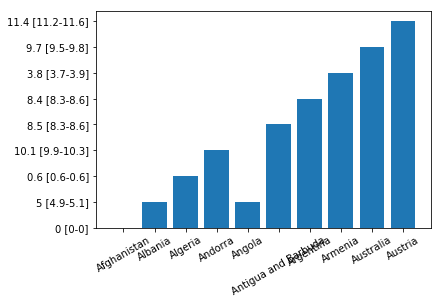

In [303]:
df_test = df[2:12]
plt.bar(df_test['Country'], df_test['2015-2017']) # plot
plt.xticks(rotation=30)

TypeError: can only concatenate str (not "float") to str

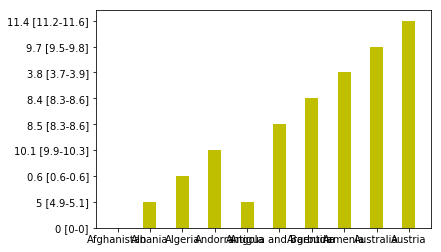

In [310]:
# name_list = ['Monday','Tuesday','Friday','Sunday']
# num_list = [1.5,0.6,7.8,6]
# num_list1 = [1,2,3,1]
# x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(df_test['Country'], df_test['2015-2017'], width=width, label='consumption',fc = 'y')
for item in df_test['Country']:
    item = item + width
plt.bar(x, df_test['Age limits Beer'], width=width, label='Age_limits',tick_label = df_test['Country'],fc = 'r')
plt.xticks(rotation=30)
plt.legend()
plt.show()